#AirBnb Bookings Analysis
Exploratory Data Analysis

#Summary of Project




This project involved performing exploratory data analysis on the Airbnb New York City dataset using Python. The dataset contained nearly 49,000 listings with various features such as room type, price, location, availability, and host information. Using libraries like Pandas, NumPy, Matplotlib, and Seaborn, the data was cleaned and analyzed to uncover key trends. Visualizations revealed that most listings are concentrated in Manhattan, with entire homes/apartments being the most common and expensive room type. Price distributions showed that most listings fall under $200, and availability varies widely across neighborhoods. The project provided meaningful insights into host behaviors, customer preferences, and pricing trends that can guide business and marketing decisions on the Airbnb platform.

In [ ]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
from google.colab import files
uploaded = files.upload()

Saving module 2 project data.csv to module 2 project data (1).csv


In [ ]:
import pandas as pd
df = pd.read_csv("module 2 project data.csv")

In [ ]:
# Initial cleaning
df.dropna(subset=["name", "host_name", "neighbourhood_group", "neighbourhood",
                  "room_type", "price", "minimum_nights"], inplace=True)


In [ ]:

# Fill missing reviews_per_month with 0
df["reviews_per_month"] = df["reviews_per_month"].fillna(0)

In [ ]:
# Convert date to datetime
df["last_review"] = pd.to_datetime(df["last_review"])

In [ ]:
# Basic info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 48858 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48858 non-null  int64         
 1   name                            48858 non-null  object        
 2   host_id                         48858 non-null  int64         
 3   host_name                       48858 non-null  object        
 4   neighbourhood_group             48858 non-null  object        
 5   neighbourhood                   48858 non-null  object        
 6   latitude                        48858 non-null  float64       
 7   longitude                       48858 non-null  float64       
 8   room_type                       48858 non-null  object        
 9   price                           48858 non-null  int64         
 10  minimum_nights                  48858 non-null  int64         
 11  number_

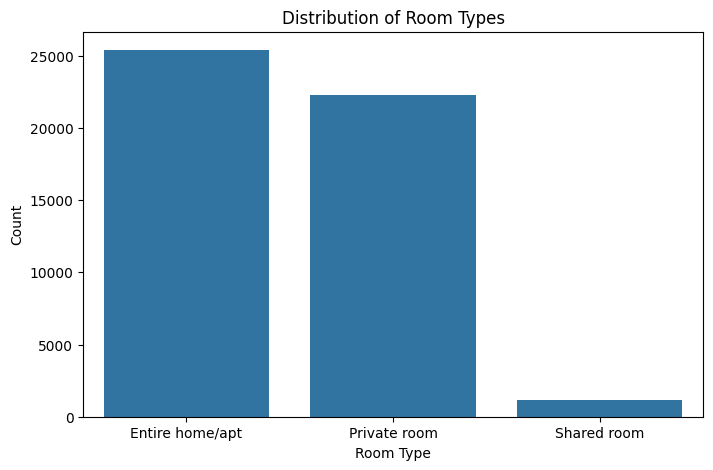

In [ ]:
# VISUALIZATION 1: Room Type Distribution
# -----------------------------
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="room_type", order=df["room_type"].value_counts().index)
plt.title("Distribution of Room Types")
plt.xlabel("Room Type")
plt.ylabel("Count")
plt.show()

<ipython-input-11-f47e467d0f82>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="neighbourhood_group", order=df["neighbourhood_group"].value_counts().index, palette="Set2")


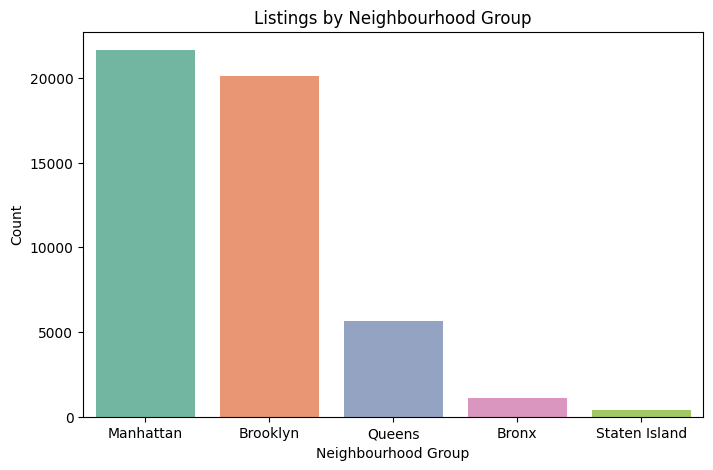

In [ ]:
# VISUALIZATION 2: Neighbourhood Group Distribution
# -----------------------------
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="neighbourhood_group", order=df["neighbourhood_group"].value_counts().index, palette="Set2")
plt.title("Listings by Neighbourhood Group")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Count")
plt.show()

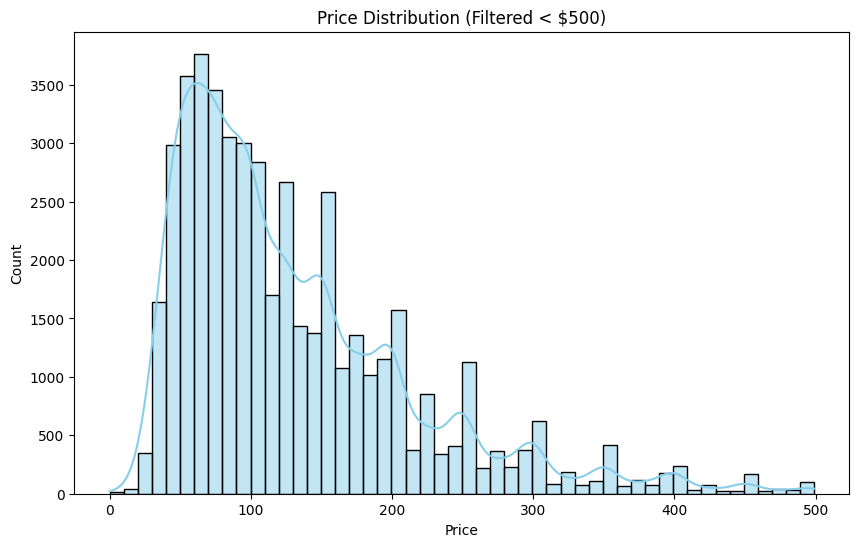

In [ ]:
# VISUALIZATION 3: Price Distribution (Filtered under $500)
# -----------------------------
plt.figure(figsize=(10, 6))
sns.histplot(df[df["price"] < 500]["price"], bins=50, kde=True, color='skyblue')
plt.title("Price Distribution (Filtered < $500)")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()


<ipython-input-13-51c532e61a4f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="neighbourhood_group", y="availability_365", palette="Set3")


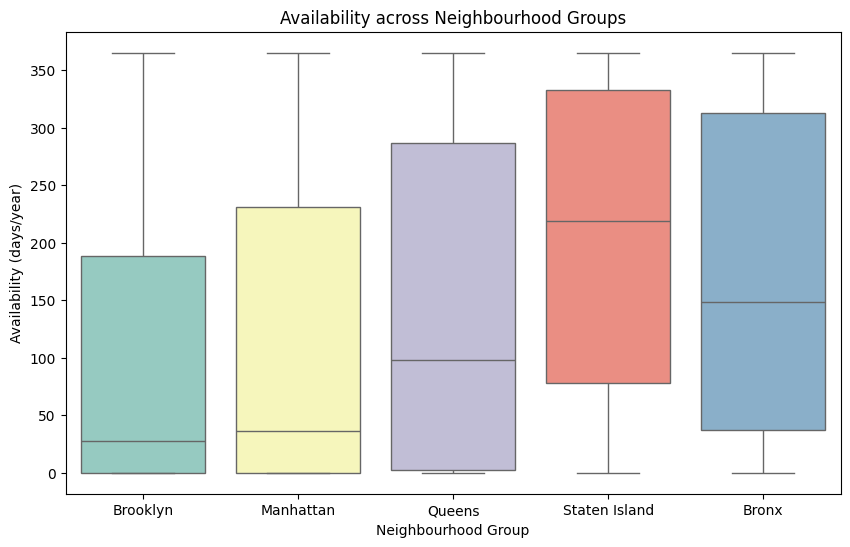

In [ ]:
# VISUALIZATION 4: Availability by Neighbourhood Group
# -----------------------------
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="neighbourhood_group", y="availability_365", palette="Set3")
plt.title("Availability across Neighbourhood Groups")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Availability (days/year)")
plt.show()


<ipython-input-14-8dd5a728c2ca>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[df["price"] < 500], x="room_type", y="price", palette="pastel")


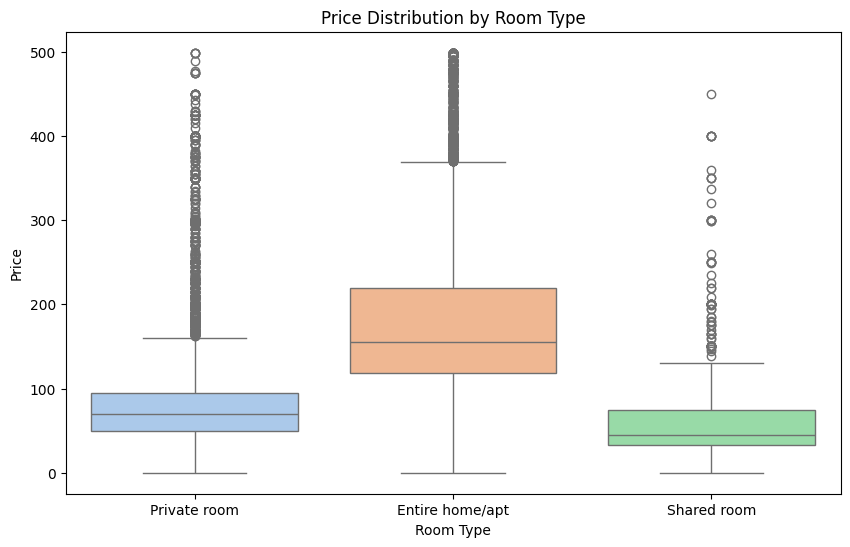

In [ ]:
# VISUALIZATION 5: Price vs Room Type (Boxplot)
# -----------------------------
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[df["price"] < 500], x="room_type", y="price", palette="pastel")
plt.title("Price Distribution by Room Type")
plt.xlabel("Room Type")
plt.ylabel("Price")
plt.show()


<ipython-input-15-51b1cb67ef09>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_hoods.index, y=top_hoods.values, palette="viridis")


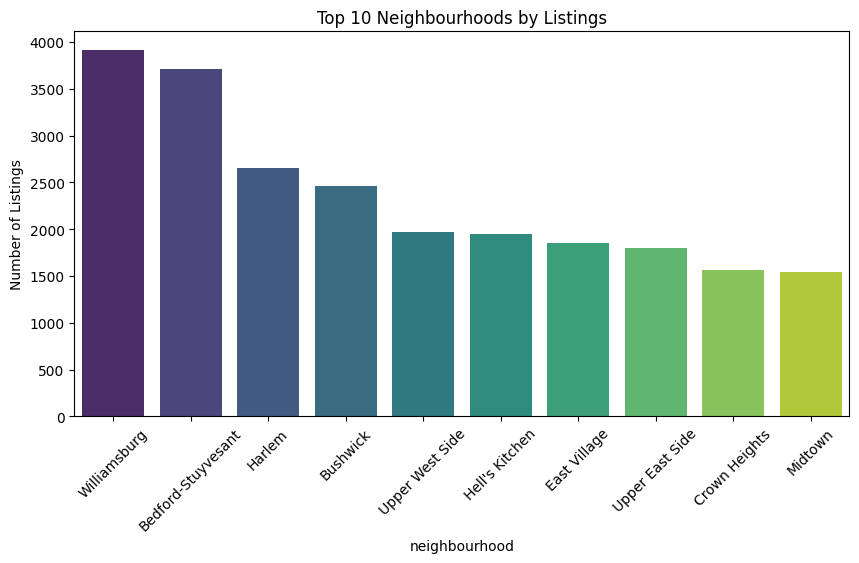

In [ ]:
# Extra: Top 10 Neighborhoods by Listings
# -----------------------------
top_hoods = df["neighbourhood"].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_hoods.index, y=top_hoods.values, palette="viridis")
plt.title("Top 10 Neighbourhoods by Listings")
plt.ylabel("Number of Listings")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# INSIGHTS / ANALYSIS
# -----------------------------

# Q1: Are private rooms preferred?
room_type_counts = df["room_type"].value_counts(normalize=True)
print("Room Type Preference (%):\n", room_type_counts * 100)


Room Type Preference (%):
 room_type
Entire home/apt    51.973065
Private room       45.654755
Shared room         2.372181
Name: proportion, dtype: float64


In [ ]:
# Q2: Is Manhattan more popular?
manhattan_share = df["neighbourhood_group"].value_counts(normalize=True)["Manhattan"]
print(f"\n% of Listings in Manhattan: {manhattan_share * 100:.2f}%")



% of Listings in Manhattan: 44.30%


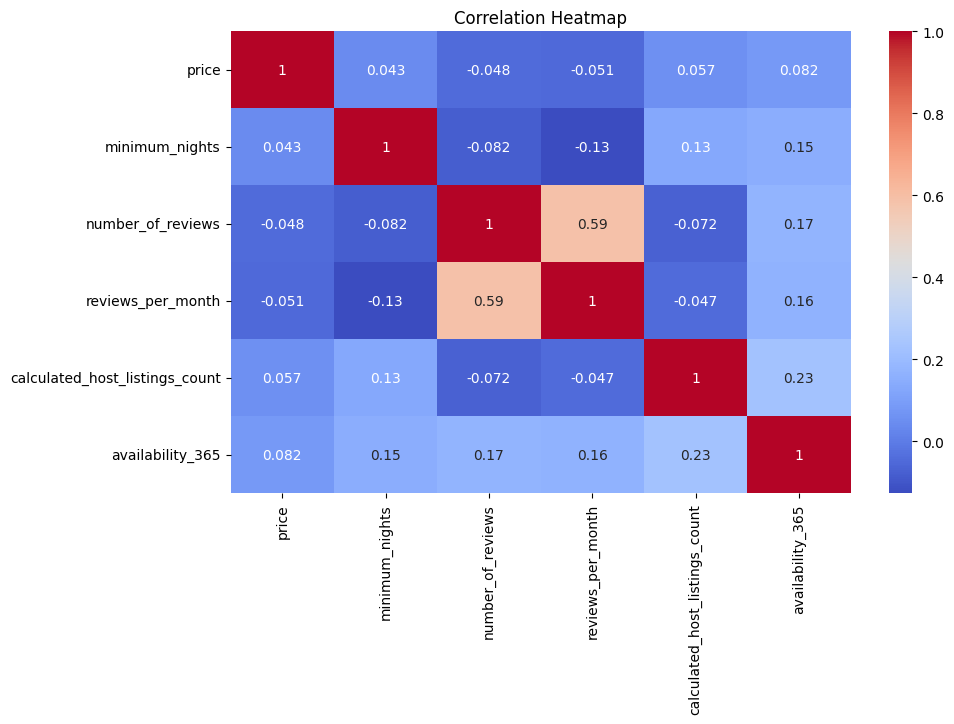

In [ ]:
# Q3: Correlation Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df[["price", "minimum_nights", "number_of_reviews", "reviews_per_month",
                "calculated_host_listings_count", "availability_365"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

#Conclusion
The exploratory analysis of the NYC Airbnb dataset, consisting of 48,895 listings, revealed important trends in host behavior, pricing, and geographical distribution. The majority of listings are in Manhattan (21,661 listings), followed by Brooklyn (20,122), showing a clear concentration in popular urban areas. Among room types, entire homes/apartments account for over 52% of listings and are also the most expensive, with an average price of around $211, compared  to  $89 for private rooms. While most listings are reasonably priced (under $200), some extreme values exceed $1000, suggesting the presence of luxury or mispriced properties. The average number of reviews is 23, and around 30% of listings have zero availability, indicating inactive or seasonal usage. These findings provide actionable insights for hosts to optimize their pricing and availability strategies and help Airbnb better understand user and host behavior across different boroughs.